/Users/finnwethall


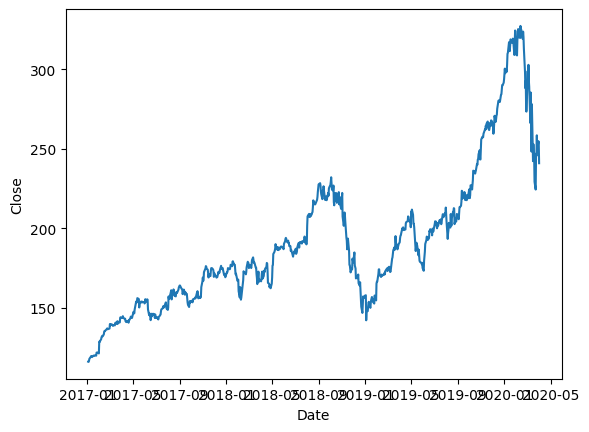

116.1500015258789
9092    116.150002
9093    115.150002
9094    114.150002
9095    113.150002
9096    114.150002
           ...    
9904     60.150002
9905     61.150002
9906     62.150002
9907     61.150002
9908     62.150002
Name: random_prediction, Length: 817, dtype: float64


/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_66664/1181613308.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_modern_df['random_prediction'] = walk


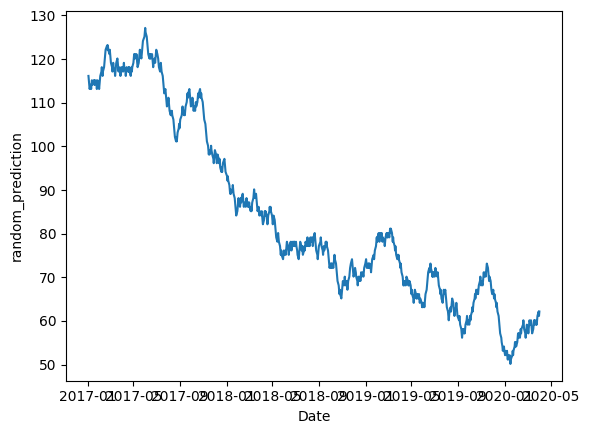

           Date       Close  random_prediction  difference
9092 2017-01-03  116.150002         116.150002    0.000000
9093 2017-01-04  116.019997         115.150002    0.869995
9094 2017-01-05  116.610001         114.150002    2.459999
9095 2017-01-06  117.910004         113.150002    4.760002
9096 2017-01-09  118.989998         114.150002    4.839996
...         ...         ...                ...         ...
9904 2020-03-26  258.440002          60.150002  198.290001
9905 2020-03-27  247.740005          61.150002  186.590004
9906 2020-03-30  254.809998          62.150002  192.659996
9907 2020-03-31  254.289993          61.150002  193.139992
9908 2020-04-01  240.910004          62.150002  178.760002

[817 rows x 4 columns]


/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_66664/1181613308.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_modern_df['difference'] = apple_modern_df['Close'] - apple_modern_df['random_prediction']


In [37]:
%matplotlib inline

import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
print(os.getcwd())
#os.chdir('/Users/finnwethall/Downloads')
apple_df = pd.read_csv('/Users/finnwethall/Downloads/archive/stocks/AAPL.csv')
apple_df['Date'] = pd.to_datetime(apple_df['Date'])


cutoff = datetime(2017,1,1)
apple_modern_df = apple_df[apple_df['Date'] > cutoff]


sns.lineplot(x='Date', y='Close', data=apple_modern_df)
plt.show()

#random Walk

#we initialize a random walk with starting value equal to that of the last stock price for the modern era. 
#this should create a general 
start = apple_df[apple_df['Date'] == '2017-01-03']['Close'].values[0]
print(start)
walk = [start]
#with i = 1000, we predict for roughly 3 years
for i in range(len(apple_modern_df['Date'])-1):
    up_or_down = random.randint(0,1)
    
    if up_or_down == 1:
        val = walk[-1] +1
        walk.append(val)
    else :
        val = walk[-1]-1
        walk.append(val)


#print(walk)
#plt.plot(range(len(walk)), walk)
#plt.title('Walk')
#plt.show()

temp = [start]
#temp[-1] + random.randint(-1,1) for date in apple_modern_df['Date']
apple_modern_df['random_prediction'] = walk

print(apple_modern_df['random_prediction'])

sns.lineplot(data=apple_modern_df, x='Date', y='random_prediction')
plt.show()

apple_modern_df['difference'] = apple_modern_df['Close'] - apple_modern_df['random_prediction']

print(apple_modern_df[['Date', 'Close', 'random_prediction','difference']])

